In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
sns.set()
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_sample = pd.read_csv('20171016-210106-DataSample.csv',dtype={"value": float})
data_sample2 = pd.read_csv('20171016-210304-DataSample.csv',dtype={"value": float})
data_sample3 = pd.read_csv('20171016-210529-DataSample.csv',dtype={"value": float})
data_sample4 = pd.read_csv('20171016-235959-DataSample.csv',dtype={"value": float})

data_sample = data_sample.append([data_sample2,data_sample3,data_sample4])
data_sample['startDate'] = pd.to_datetime(data_sample['startDate']) 
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['endDate'] = pd.to_datetime(data_sample['endDate'])


to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 
data_sample['owner'].unique()

array(['00000000-56ff-538b-2223-e1800b5e3ddb',
       '00000000-5851-ee08-eb34-e20acc5af74e',
       'd145b032-b7a5-4fa8-9887-b46598f4683a',
       '00000000-5951-4787-2497-ae32dc8d07d4',
       '00000000-584e-1f39-bdee-d4102b989d01',
       '00000000-584d-a4f0-bdee-d4102b989ce5'], dtype=object)

In [3]:
data_sample = pd.read_csv('DataSample__201709211530.csv')
data_sample2 = pd.read_csv('DataSample__201710061552.csv',dtype={"value": str})
#data_sample2['value'] = pd.to_numeric(data_sample2['value'],errors='coerce')
#data_sample['value'] = pd.to_numeric(data_sample['value'],errors='coerce')
data_sample = data_sample.append(data_sample2)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)


types = data_sample['type'].unique()
types

for t in types:
    f = lambda x: float(x.replace(',',''))
    # checks if the values contain decimal points, and uses a float conversion if so
    for v in data_sample.loc[data_sample['type'] == t, 'value'].head():
        if '.' in v:
            f = lambda x: float(x.replace(',',''))
            break
    data_sample.loc[data_sample['type'] == t, 'value'] = data_sample.loc[data_sample['type'] == t, 'value'].map(f)
for col in ['startDate', 'endDate', 'createdAt', 'updatedAt']:
    data_sample[col] = pd.to_datetime(data_sample[col], format='%Y-%m-%d %X')
to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration,day_of_week
0,1ff0fb89-6e1b-4601-84d0-98c79fdc5f2e,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,A1DB680E-F9C4-4FA4-8818-1D35E398B5F0,Health Mate,health-bmi,2014-08-27 21:41:23,2014-08-27 21:41:23,26.7387,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,0 days,2
1,78219621-1da4-4e3b-87bc-f4885718c63f,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,2030515A-1C70-40F3-8470-BDE99ABFC906,Health Mate,health-weight,2014-08-27 21:41:23,2014-08-27 21:41:23,71.042,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,0 days,2
2,2d917e7e-0844-4f52-b15e-2a5346c96dda,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,96D21A44-67D7-412D-BF3A-543819A8EBF0,Health Mate,health-bmi,2014-08-28 06:24:53,2014-08-28 06:24:53,26.5866,NaN,NaN,2017-08-31 11:20:49,2017-08-31 11:20:49,0 days,3
3,ab800f4b-bef7-434e-8e57-e0fccc44bfb7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5D73FD9D-17E1-480C-9235-3E5036503E6A,Health Mate,health-body-fat,2014-08-28 06:24:53,2014-08-28 06:24:53,0.258699,NaN,NaN,2017-08-31 11:20:53,2017-08-31 11:20:53,0 days,3
4,fb2a0865-17c3-4ac0-a782-749cc7befe12,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,5A9AB03C-30C9-43B9-9742-02E237A6F36D,Health Mate,health-weight,2014-08-28 06:24:53,2014-08-28 06:24:53,70.638,NaN,NaN,2017-08-31 11:20:58,2017-08-31 11:20:58,0 days,3


In [4]:
data_sample['type'].unique()

array(['health-bmi', 'health-weight', 'health-body-fat', 'health-sleep',
       'health-heart-rate', 'health-step-count'], dtype=object)

In [5]:
steps = data_sample[data_sample['type'] == 'health-step-count']
steps.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration,day_of_week
4704,13109bff-f113-4e60-be9c-775704362497,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,0266D321-9615-4671-BAD6-82591AD82136,Health Mate,health-step-count,2017-08-01 18:41:00,2017-08-01 18:42:00,90,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:00,1
4705,64fa3f41-6c61-4e18-b15d-0576cffb044c,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.CAD564E9-53CC-4C8F-...,618AA830-19CC-488B-81EE-DEC0E4E24A3C,Rostom 2,health-step-count,2017-08-01 18:41:24,2017-08-01 18:42:26,91,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:02,1
4706,a9649961-af44-4b5b-91f9-f8303d64a30a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,3AE610F8-E609-411E-98FC-154AF9DC5383,Health Mate,health-step-count,2017-08-01 18:42:00,2017-08-01 18:43:00,90,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:00,1
4707,f3d9bda7-4201-4d41-aa48-90eff0491ca7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.health.CAD564E9-53CC-4C8F-...,4858CD3F-A62E-4A0C-9394-70FECBD92A69,Rostom 2,health-step-count,2017-08-01 18:42:26,2017-08-01 18:43:27,109,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:01,1
4708,7a099290-79f1-4c57-9026-068584765333,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.withings.wiScaleNG,55B0736C-E686-4BB5-8AB7-A4F82E74AE3D,Health Mate,health-step-count,2017-08-01 18:43:00,2017-08-01 18:44:00,90,NaN,NaN,2017-08-31 11:24:40,2017-08-31 11:24:40,00:01:00,1


In [6]:
steps['source'].unique()

array(['healthkit:com.withings.wiScaleNG',
       'healthkit:com.apple.health.CAD564E9-53CC-4C8F-934C-28406D8C5F48',
       'healthkit:com.apple.health.ED743E41-5AB8-4C97-B0BA-D6920060C95C',
       'healthkit:com.apple.health.88795572-5859-4B64-B6E7-C3506B4D3F55',
       'healthkit:com.apple.health.9B500D54-FF92-423A-9188-CF39728F1AC7',
       'healthkit:com.apple.health.70DD0B80-D9E8-4EBF-AFEB-07BA6CFE9C3B',
       'healthkit:com.apple.health.1150EFCF-3A78-40B9-8F7F-132BE0D01786',
       'healthkit:com.apple.health.6BF12831-C3BC-4E1C-8372-B9FB3EA14AEA'], dtype=object)

In [7]:
steps.index = steps['startDate']
steps['value'] = pd.Series(steps['value']).convert_objects(convert_numeric=True)

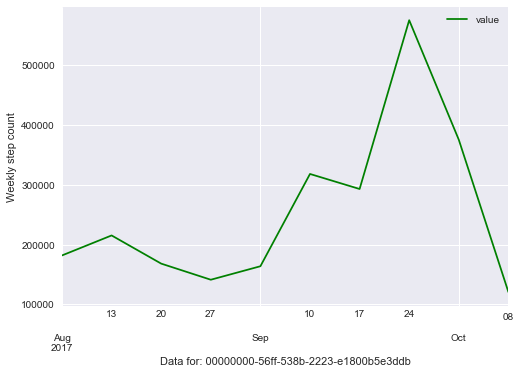

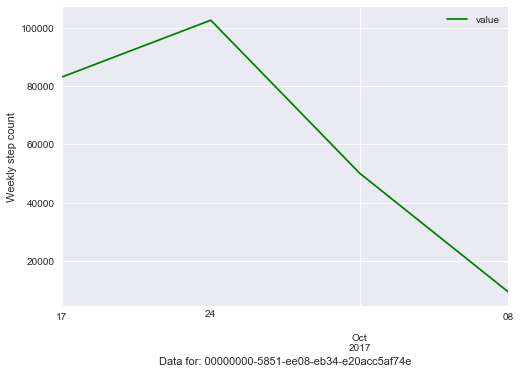

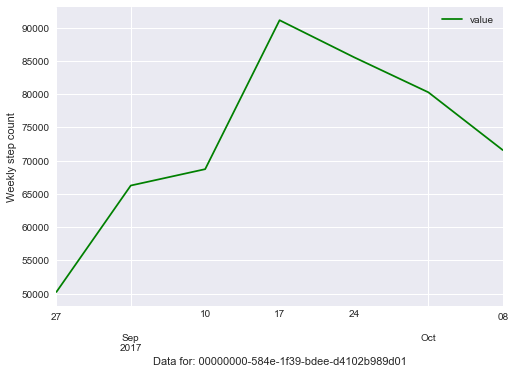

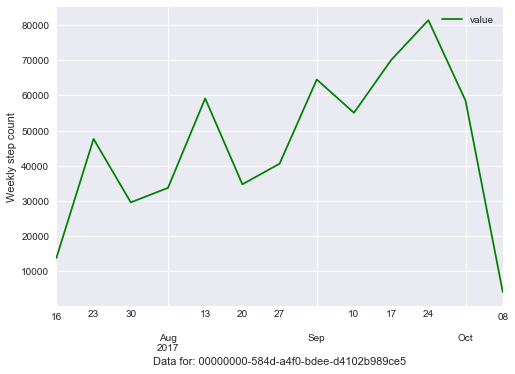

In [8]:
# weekly steps
for owner in steps['owner'].unique():
    steps[steps['owner'] == owner][['value']].resample('W').sum().plot(color='green')
    plt.xlabel("Data for: " + owner)
    plt.ylabel("Weekly step count")

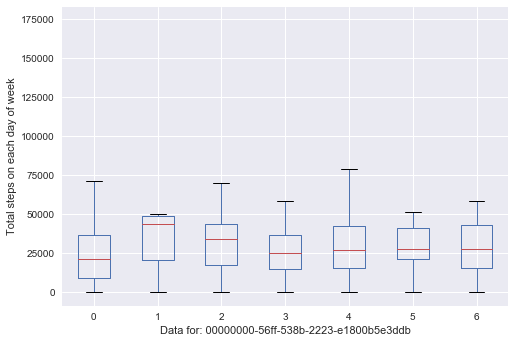

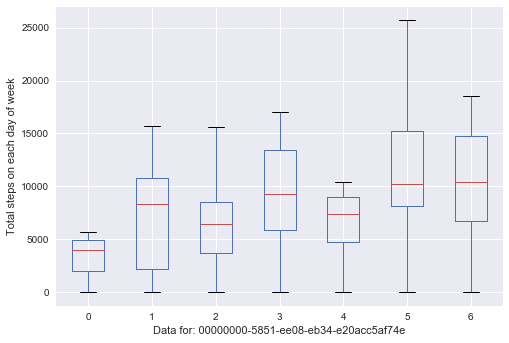

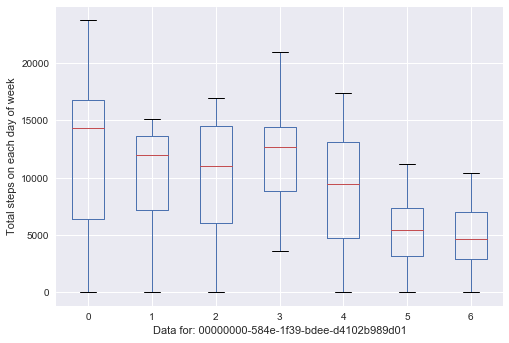

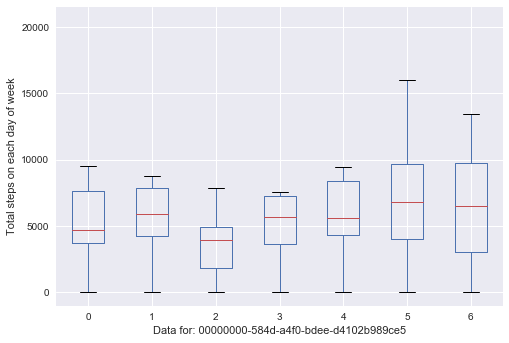

In [9]:
# steps by day of the week
for owner in steps['owner'].unique():
    data_by_owner = steps[steps['owner'] == owner][['value']]
    stats = data_by_owner.resample('D').sum().groupby(lambda x: x.dayofweek).describe()
    # print(stats)
    stats.transpose().plot(kind='box')
    plt.xlabel("Data for: " + owner)
    plt.ylabel("Total steps on each day of week")

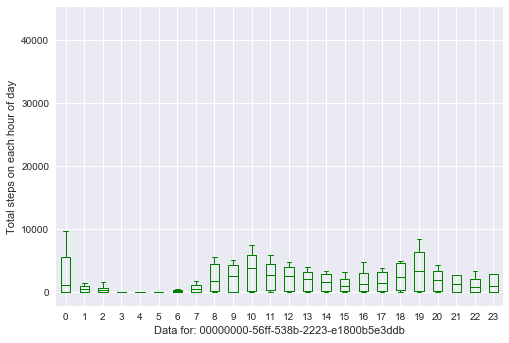

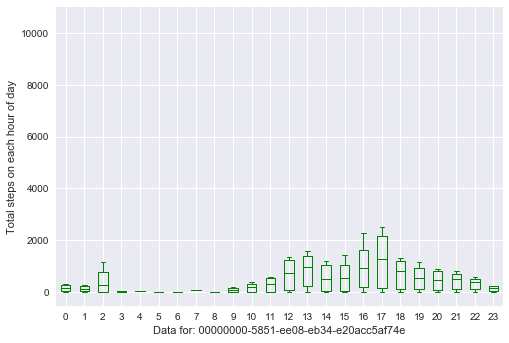

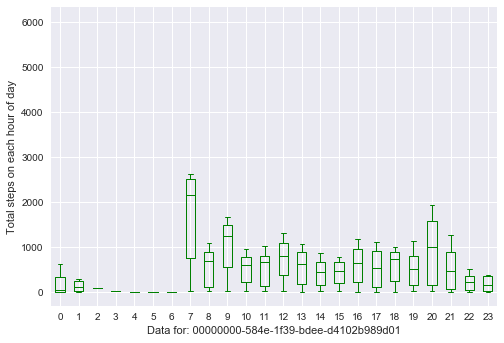

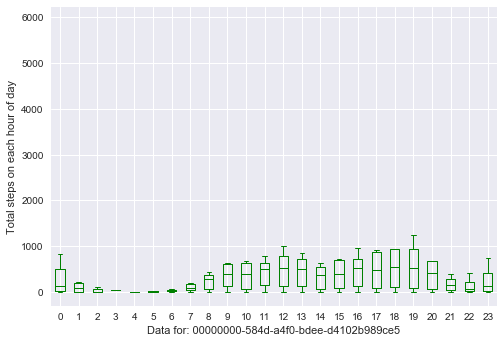

In [10]:
# steps by time of day
for owner in steps['owner'].unique():
    data_by_owner = steps[steps['owner'] == owner][['value']]
    d = data_by_owner.resample('H').sum().groupby(lambda x: x.hour).describe()
    d.transpose().plot(kind='box', color='green')
    plt.xlabel("Data for: " + owner)
    plt.ylabel("Total steps on each hour of day")

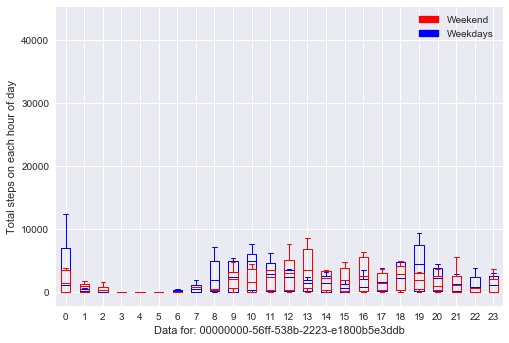

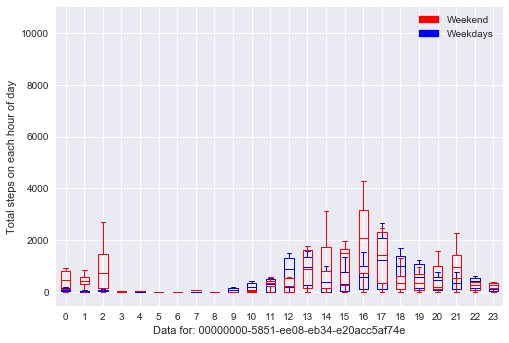

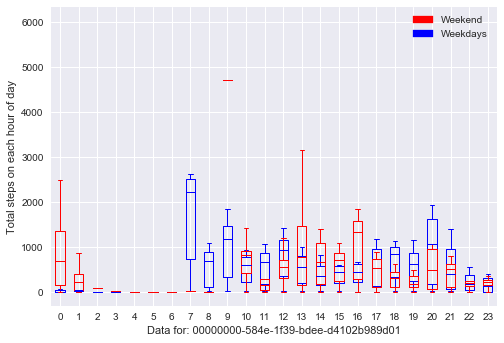

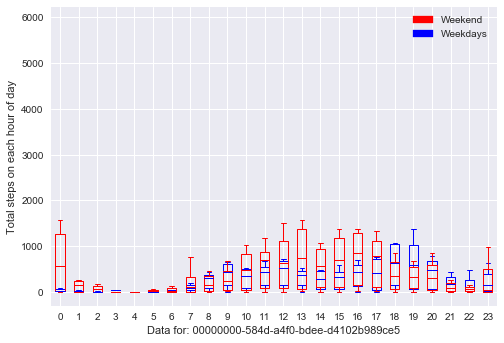

In [11]:
# steps by time of day during the week and weekends
weekday_data = steps[steps['day_of_week'] < 5]
weekend_data = steps[steps['day_of_week'] >= 5]

for owner in steps['owner'].unique():
    data_by_owner = weekday_data[weekday_data['owner'] == owner][['value']]
    d = data_by_owner.resample('H').sum().groupby(lambda x: x.hour).describe()
    ax = d.transpose().plot(kind='box', color='blue')
    
    data_by_owner = weekend_data[weekend_data['owner'] == owner][['value']]
    d = data_by_owner.resample('H').sum().groupby(lambda x: x.hour).describe()
    d.transpose().plot(kind='box', color='red', ax=ax)
    
    plt.xlabel('Data for: ' + owner)
    plt.ylabel('Total steps on each hour of day')
    weekend = mpatches.Patch(color='red', label='Weekend')
    weekdays = mpatches.Patch(color='blue', label='Weekdays')
    plt.legend(handles=[weekend, weekdays], loc=1)

In [12]:
def fourpm_split(row):
    start = data_sample.iloc[row]['startDate']
    if start.hour > 15:
        return start.strftime('%Y-%m-%d')
    else:
        return (start - timedelta(1)).strftime('%Y-%m-%d')

In [13]:
def sleep_agg(grouped):
    result_df = pd.DataFrame(columns=sleep.columns)
    for name, group in grouped:
        # this assumes that there are no duplicates; if not, they can be removed here:
        # group = group.drop_duplicates(subset=['startDate', 'endDate'])
        
        # this also assumes that the startDates are never decreasing, but if this is
        # not true, the group can be sorted by startDate here:
        # group = sorted(group, key=lambda row: row['startDate'])
        
        entry = {}
        
        # finding startDate, endDate, and duration
        startDate, endDate, duration = group.iloc[0][['startDate', 'endDate', 'duration']]
        for i in range(1, len(group)):
            # prints a warning if the sleep data crosses the daily separator of 4pm
            if group.iloc[i]['endDate'].hour > 15:
                print('Warning: an entry on ', str(name), ' crosses 4pm')
            if endDate > group.iloc[i]['endDate']:
                continue
            elif group.iloc[i]['startDate'] < endDate:
                endDate = group.iloc[i]['endDate']
                duration += group.iloc[i]['duration'] - (endDate - group.iloc[1]['startDate'])
            else:
                endDate = group.iloc[i]['endDate']
                duration += group.iloc[i]['duration']
        entry.update({
            'startDate': startDate,
            'endDate': endDate,
            'duration': duration
        })
        
        # if we want to keep all the other stuff, take them from the first row in the group
        cols = ['_id', 'owner', 'source', 'sourceId', 'sourceName', 'type',
                'value', 'content', 'originalData', 'createdAt', 'updatedAt']
        entry.update({col: group.iloc[0][col] for col in cols})
        
        # adds the new row
        result_df = result_df.append(pd.Series(entry, name=name))
    return result_df

In [14]:
sleep = data_sample[data_sample['type'] == 'health-sleep']
sleep = sleep.drop_duplicates(subset=['startDate', 'endDate'])
sleep.head()

,_id,owner,source,sourceId,sourceName,type,startDate,endDate,value,content,originalData,createdAt,updatedAt,duration,day_of_week
858,f9952b6c-2aaa-45a2-a65a-b5663f0fc9a7,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,9FA8A1C3-FAF5-4A96-9E8E-1AE07FB14FC5,Clock,health-sleep,2016-09-21 23:00:00,2016-09-22 07:00:11,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,08:00:11,2
865,c4ffe7da-1ca3-4391-8046-739adb77c904,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,0D4C5E70-BD27-41D7-AC6F-59CC3AE2762D,Clock,health-sleep,2016-09-22 23:23:16,2016-09-23 07:00:13,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,07:36:57,3
871,f1cada9f-cd44-4477-a1df-e8dc164e164c,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,BCBBC4F8-EC07-4814-84CA-B7EC00AB8129,Clock,health-sleep,2016-09-26 02:14:28,2016-09-26 07:00:52,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,04:46:24,0
872,d17aece4-be2c-45e2-89a2-49c5d612663a,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,5B20853B-8C51-4E14-85BA-BAA0F9155C92,Clock,health-sleep,2016-09-26 23:00:00,2016-09-27 07:00:24,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,08:00:24,0
875,33532560-8801-4710-9056-172823ec1995,00000000-56ff-538b-2223-e1800b5e3ddb,healthkit:com.apple.mobiletimer,DBCB7BA1-5A69-449F-908B-955D1F85D837,Clock,health-sleep,2016-09-28 00:44:44,2016-09-28 08:30:26,0,NaN,NaN,2017-08-31 11:24:44,2017-08-31 11:24:44,07:45:42,2


In [15]:
for owner in steps['owner'].unique():
    sleep_by_owner = sleep[sleep['owner'] == owner]
    if len(sleep_by_owner) == 0:
        print("Owner: " + owner + " does not have sleep data")
        continue
    fourpm_groups = sleep_by_owner.groupby(fourpm_split)
    nightly_sleep = sleep_agg(fourpm_groups)
    nightly_sleep.index = pd.to_datetime(nightly_sleep.index)
    nightly_sleep['duration'] = nightly_sleep['duration'].map(lambda x: x.total_seconds())
    
    steps_val_by_owner = steps[steps['owner'] == owner]['value'].resample('D').sum().dropna()
    # steps_val_by_owner.index = steps_val_by_owner.index.date
    
    # print(nightly_sleep[['duration']])
    # print(steps_val_by_owner)
    
    r = steps_val_by_owner.corr(nightly_sleep['duration'], min_periods=10)
    if pd.isnull(r):
        print("Owner: " + owner + " does not have enough sleep data")
    else:
        print("The value of r for owner: " + owner + " is: " + str(r))

The value of r for owner: 00000000-56ff-538b-2223-e1800b5e3ddb is: -0.0856293062798
Owner: 00000000-5851-ee08-eb34-e20acc5af74e does not have enough sleep data
Owner: 00000000-584e-1f39-bdee-d4102b989d01 does not have sleep data
Owner: 00000000-584d-a4f0-bdee-d4102b989ce5 does not have enough sleep data
